Importando as bibliotecas necessárias:

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

Para implementar computacionalmente vamos definir uma classe Graph, em que um dos comportamentos de seu objeto é encntrar a árvore geradora mínima através do método de Kruskal.

In [8]:
class Graph: 

	def __init__(self, vertices): 
		self.V = vertices 
		self.graph = [] 
		
    # adicionar os vértices
	def addEdge(self, u, v, peso): 
		self.graph.append((u, v, peso)) 

	# Find retorna a raiz da árvore de um dado vértice
	def find(self, raiz, i): 
		# Se a raiz não for o próprio vértice ele busca no antecessor
		# Se tiverem mesma raiz então estão contidos na mesma árvore geradora 
		if raiz[i] != i: 
			raiz[i] = self.find(raiz, raiz[i]) 
		return raiz[i] 

	# Union adiciona uma aresta se os vértices estiverem em conjuntos disjuntos
    # Essa função evita adicionar arestas que formem ciclos
	def union(self, raiz, nivel, x, y): 

		# Coloca a raiz da árvore de menor nível como raiz da união das árvores 
		if nivel[x] < nivel[y]: 
			raiz[x] = y 
		elif nivel[x] > nivel[y]: 
			raiz[y] = x 

		# Se tem mesmo nível, coloca a raiz de uma das árvores e aumentam em 1 o nível 
		else: 
			raiz[y] = x 
			nivel[x] += 1

	# Função principal
	def KruskalMST(self): 
		# Árvore resultante 
		mst = [] 

		# Ordenando pelo peso da aresta
		self.graph = sorted(self.graph, key=lambda item: item[2])

        # Variável para guardar a raiz
		raiz = [] 
		# Variável para guardar a profundidade
		nivel = [] 

		# Adicionando o primeiro vértice 
		for node in range(self.V): 
			raiz.append(node) 
			nivel.append(0) 

		# índices para as arestas ordenadas 
		i = 0

		# arestas na árvore gerada 
		e = 0

		# Número de arestas deve ser v-1  
		while e < self.V - 1: 
            # Pega vértices da aresta de menor peso
			u, v, peso = self.graph[i]
			# Itera para a aresta seguinte de menor peso 
			i = i + 1
			
            # Retorna a raiz de cada vértice dado
			x = self.find(raiz, u) 
			y = self.find(raiz, v) 

			# Se tiverem raízes diferentes então a aresta entre os vértices não forma ciclo
			if x != y: 
				e = e + 1
				# Adiciona a aresta na árvore gerada
				mst.append((u, v, peso)) 
				# Faz a união da aresta adicionada com a árvore gerada anteriormente
				self.union(raiz, nivel, x, y) 
			# Else descarta a aresta, pois forma um ciclo

		minimumCost = 0
		# Iteração para calcular o peso total
		for u, v, peso in mst: 
			minimumCost += peso 
		return mst, minimumCost

    # Método para exibir o peso e arestas contidas na árvore gerada
	def mst(self):
		mst ,totalweight = self.KruskalMST()
		print(f"Peso total da MST: {totalweight}\nMatriz de adjacência da MST: \n {np.array(mst)}")


	# Plotando o grafo
	def drawing(self):

		# Criando o objeto 
		figure = nx.Graph()
		figure.add_weighted_edges_from(self.graph)

		# Adcionando posição para cada vértice
		pos = nx.spring_layout(figure,seed=7)

		# Adicionando peso como atributo da aresta
		for u,v,w in self.graph:
			nx.add_path(figure, [u,v], weight=w)
		
		# Adicionando peso como legenda
		edge_labels = nx.get_edge_attributes(figure, 'weight')
		# Plotando o gráfico
		nx.draw(figure, pos, with_labels = True)
		nx.draw_networkx_edge_labels(figure, pos, edge_labels=edge_labels)
		
		plt.title("Grafo original")
		plt.show()

		# Acessando a árvore mínima gerada
		minimum = self.KruskalMST()[0]
		minimum = sorted(minimum, key=lambda item: item[2])

		# Adicionando peso como atributo da aresta
		for u,v,w in minimum:
			nx.add_path(figure, [u,v], weight=w)
			
		# Criando o objeto
		figure2 = nx.Graph()
		figure2.add_weighted_edges_from(minimum)
	
		# Adicionando peso como legend da aresta
		# Plotando
		nx.draw(figure2, pos, with_labels = True)
		edge_labels = nx.get_edge_attributes(figure2, "weight")
		nx.draw_networkx_edge_labels(figure2, pos, edge_labels=edge_labels)

		plt.title("Grafo MST")
		plt.show()
		

O objeto da classe "Graph" é inicializado com o argumento que é a quantidade de vértices presentes no grafo, logo após é usado o método "addEdge" para adicinar as arestas presentes no grafo.

In [31]:
g = Graph(5) 
g.addEdge(0, 1, 10) 
g.addEdge(0, 2, 6) 
g.addEdge(0, 3, 5) 
g.addEdge(1, 3, 15) 
g.addEdge(2, 3, 4)
g.addEdge(2, 4, 4)
g.addEdge(3, 4, 5)

Com o objeto já construído e todos os seus vértices adicionados podemos verificar qual será a árvore mímina encontrada pelo algoritmo:

In [32]:
g.mst()

Peso total da MST: 23
Matriz de adjacência da MST: 
 [[ 2  3  4]
 [ 2  4  4]
 [ 0  3  5]
 [ 0  1 10]]


Esboçando o grafo:

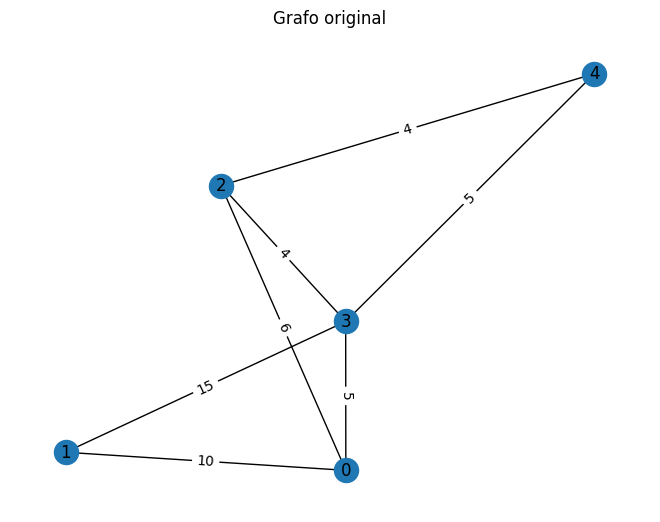

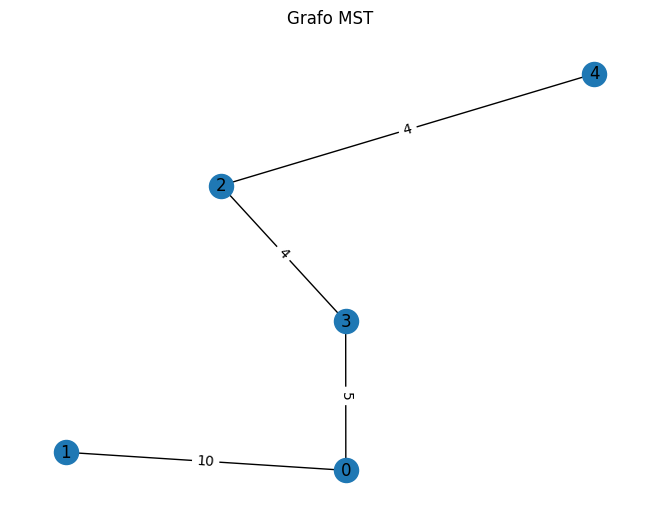

In [33]:
g.drawing()

In [ ]:
Outros exemplos:

Peso total da MST: 11
Matriz de adjacência da MST: 
 [[2 4 1]
 [2 3 2]
 [1 2 3]
 [0 2 5]]


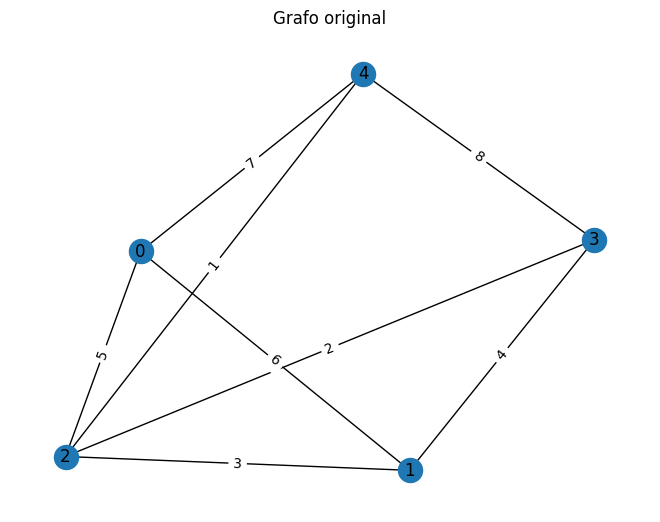

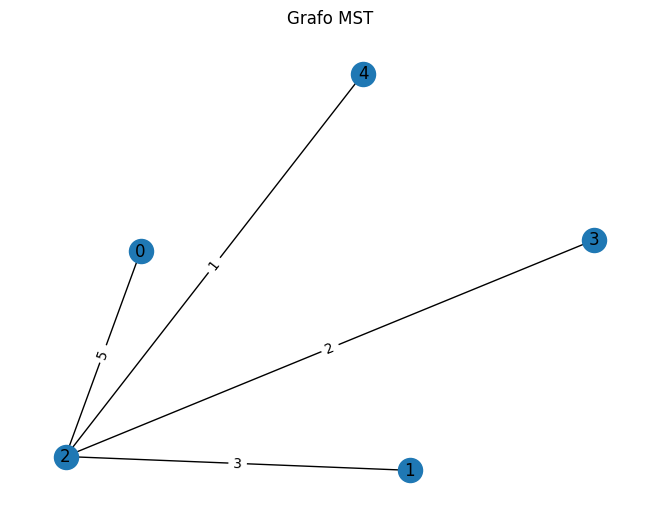

In [41]:
g1 = Graph(5)
g1.addEdge(0, 1, 6)
g1.addEdge(3, 4, 8)
g1.addEdge(1, 2, 3)
g1.addEdge(2, 3, 2)
g1.addEdge(4, 0, 7)
g1.addEdge(1, 3, 4)
g1.addEdge(0, 2, 5)
g1.addEdge(2, 4, 1)

g1.mst()
g1.drawing()

Peso total da MST: 23
Matriz de adjacência da MST: 
 [[1 2 2]
 [2 5 2]
 [6 5 2]
 [2 3 3]
 [4 3 3]
 [7 6 3]
 [0 1 4]
 [7 8 4]]


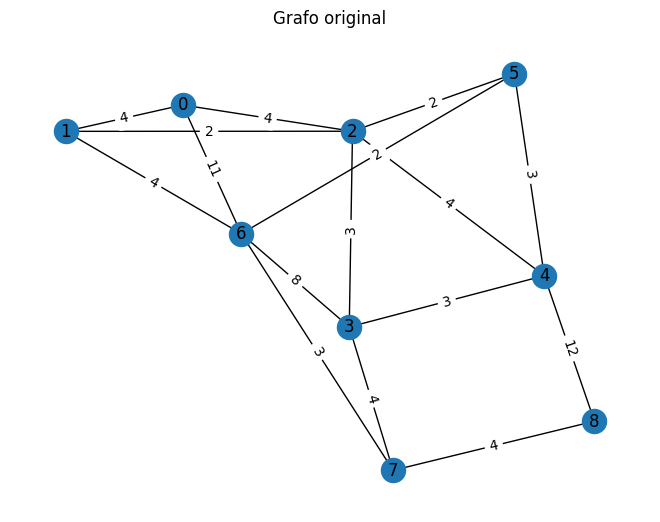

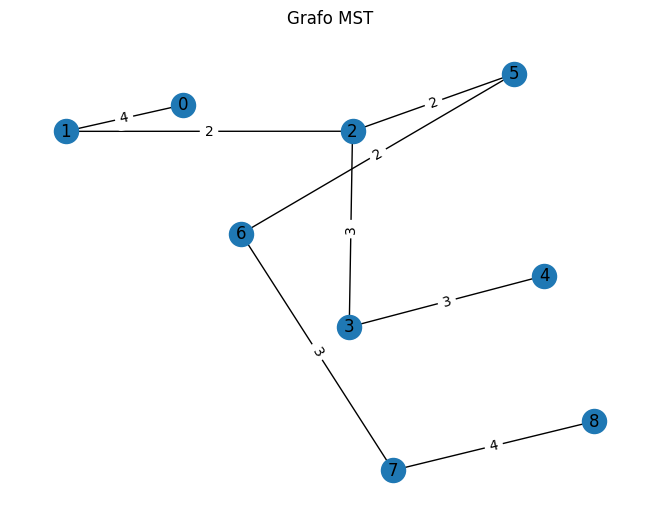

In [42]:
g = Graph(9)
g.addEdge(0, 1, 4)
g.addEdge(0, 2, 4)
g.addEdge(1, 2, 2)
g.addEdge(2, 3, 3)
g.addEdge(2, 5, 2)
g.addEdge(4, 2, 4)
g.addEdge(4, 3, 3)
g.addEdge(5, 4, 3)
g.addEdge(1, 6, 4)
g.addEdge(6, 3, 8)
g.addEdge(6, 0, 11)
g.addEdge(7, 6, 3)
g.addEdge(8, 4, 12)
g.addEdge(7, 8, 4)
g.addEdge(7, 3, 4)
g.addEdge(6, 5, 2)

g.mst()
g.drawing()